In [2]:
from google.colab import files
uploaded = files.upload()

Saving possum.csv to possum.csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('possum.csv')

df.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [4]:
df.shape


(104, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


age содержит 2 пустых значения; footlgth содержит 1 пустое значение - не страшно, ничего не удаляем


Не будем рассматривать номер слкчая и номер участка, так как в этом нет смысла, от них ничего не зависит


Text(0.5, 1.0, 'Матрица корелляции')

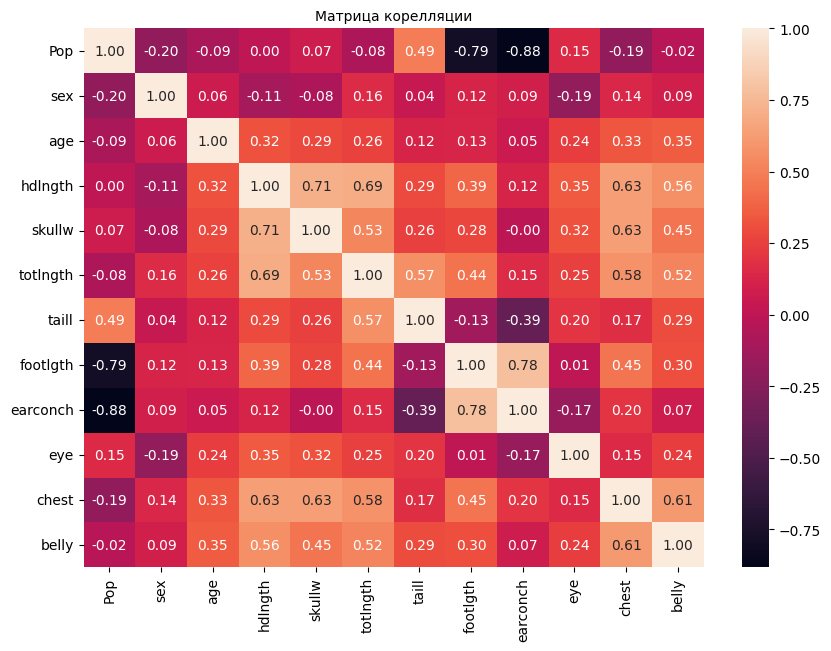

In [30]:
df1 = df.drop(columns=['case', 'site'])
print("Не будем рассматривать номер слкчая и номер участка, так как в этом нет смысла, от них ничего не зависит")
df1["Pop"] = df['Pop'].replace({'Vic': 0, 'other': 1})
df1["sex"] = df["sex"].replace({'m' : 0, 'f' : 1})

plt.figure(figsize=(10, 7))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")

plt.title('Матрица корелляции', fontsize=10)

Высокая корелляция и средняя корелляция: hdlngth(Head length) с skullw(Skull width) и с totlngth(Total length), earconch с footlgth,

**BoxPlot**

<Axes: title={'center': 'belly'}, ylabel='belly'>

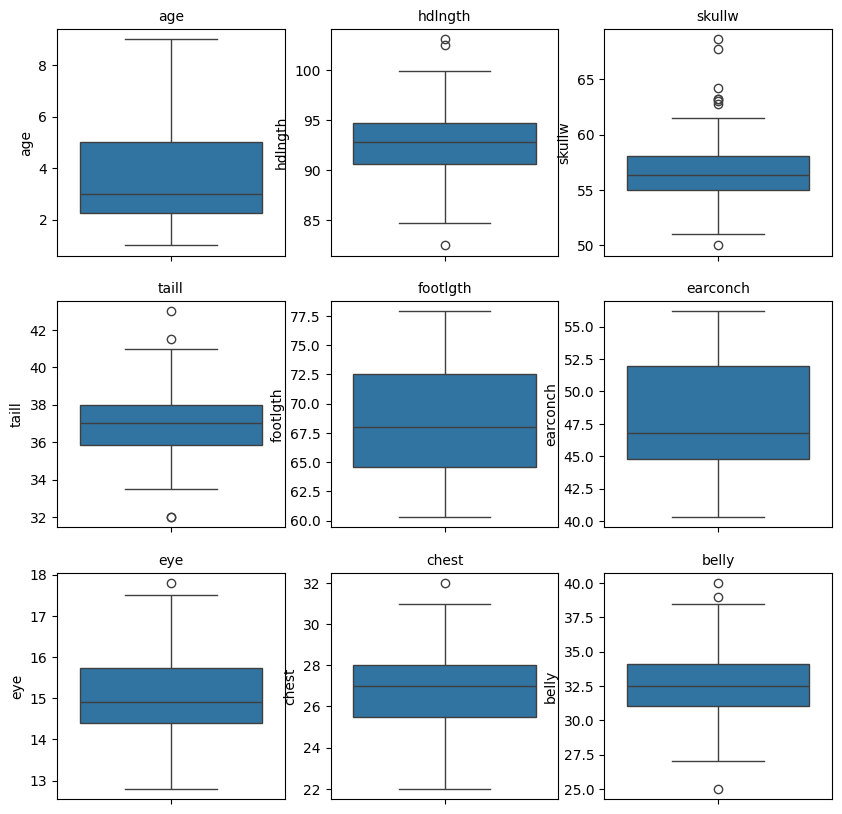

In [37]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.title('age', fontsize=10)
sns.boxplot(df["age"])

plt.subplot(332)
plt.title('hdlngth', fontsize=10)
sns.boxplot(df["hdlngth"])

plt.subplot(333)
plt.title('skullw', fontsize=10)
sns.boxplot(df["skullw"])

plt.subplot(334)
plt.title('taill', fontsize=10)
sns.boxplot(df["taill"])

plt.subplot(335)
plt.title('footlgth', fontsize=10)
sns.boxplot(df["footlgth"])

plt.subplot(336)
plt.title('earconch', fontsize=10)
sns.boxplot(df["earconch"])

plt.subplot(337)
plt.title('eye', fontsize=10)
sns.boxplot(df["eye"])

plt.subplot(338)
plt.title('chest', fontsize=10)
sns.boxplot(df["chest"])

plt.subplot(339)
plt.title('belly', fontsize=10)
sns.boxplot(df["belly"])

**Вывод:** Нет выбрососв в столбцах age, footlgth, earconch


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

df["Pop"] = df['Pop'].replace({'Vic': 0, 'other': 1})
df["sex"] = df["sex"].replace({'m' : 0, 'f' : 1})

# так как hdlngth(Head length) с skullw(Skull width) и с totlngth(Total length), то за X берем skullw и totlngth, а Y - hdlngth

x_train, x_test, y_train, y_test = train_test_split(df[['skullw', 'totlngth']], df['hdlngth'], test_size=0.3)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_train, y_train)

print('Веса признаков skullw и totlngth: ', model.coef_)
print('Свободный коэффицент:', model.intercept_)

features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))
print('y=', end="")

for i in range(coeff_df.shape[0]):
    print(f'\'{coeff_df["features"][i]}\'*{round(coeff_df["Coefficient"][i], 2)}', end="")
    if i < 3:
        print(" + ", end="")

print(f' {model.intercept_}')


Train dataset size: (72, 2), (72,)
Test dataset size: (32, 2), (32,)
Веса всех признаков (w1, ..., w13):  [0.60651432 0.39684361]
Свободный коэффицент уравнения w0: 23.687789720012645
   Coefficient  features
1     0.396844  totlngth
0     0.606514    skullw
y='skullw'*0.61 + 'totlngth'*0.4 +  23.687789720012645


**Вывод:** признак skullw более весомый чем totlngth

In [47]:
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

mmsc = MinMaxScaler()
x_norm_train = mmsc.fit_transform(x_train)
x_norm_train = pd.DataFrame(x_norm_train)

x_norm_test = mmsc.fit_transform(x_test)
x_norm_test = pd.DataFrame(x_norm_test)


model = LinearRegression()
model.fit(x_norm_train, y_train)

print("y = ",end='')
print(f"{model.intercept_:.2f}", end="")
for i, coef in enumerate(model.coef_):
    print(f" + {coef:.2f} * {x_train.columns[i]}",end="")
print()

y_pred = model.predict(x_norm_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1342.1793499761686
MSE: 1804445.1353111896
R2: -201177.68858720033
y = 84.38 + 10.67 * skullw + 8.53 * totlngth
MAE: 2.06
MSE: 7.52
R2: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Вывод после нормализации:** веса признаков остались почти в таком же отношении